<a href="https://colab.research.google.com/github/JavierElizondo1/Coder-Data-Science2/blob/main/Javier_Santos%20Elizondo%20Trevi%C3%B1o_Trabajo_Redes_Neuronales_coder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint RNs: Reconocimiento de dígitos manuscritos con extracción manual de características




# Cargando los datos

Primero vamos a cargar el dataset y visualizar algunos dígitos.

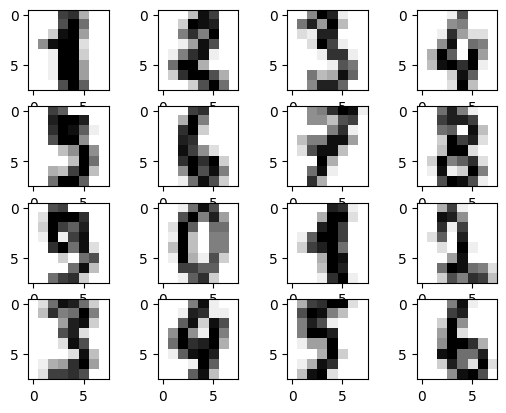

In [64]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))


# Binarizando el problema

Para comenzar con un problema más simple, sólo trabajaremos en el escenario de clasificación binaria para dígitos 0 y 1. Para eso, primero filtramos los datos y luego los particionamos en training y test folds.

In [65]:
# Cargo los dígitos
#X, y = load_digits(return_X_y=True)
X, y = digits.images, digits.target

# Filtro los que sean 0 o 1
indices = np.array(range(X.shape[0]))
bin_indices = indices[(y==0) | (y == 1)]

X_bin = X[bin_indices,:,:]
y_bin = y[bin_indices]

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

print("Total de datos para clasificación entre 10 dígitos: " + str(y.shape[0]))
print("Total de datos para clasificación binaria: " + str(y_bin.shape[0]))
print("Total de 1s para clasificación binaria: " + str(y_bin_test.sum()))
print("Total de 0s para clasificación binaria: " + str(y_bin_test.shape[0] - y_bin_test.sum()))


Total de datos para clasificación entre 10 dígitos: 1797
Total de datos para clasificación binaria: 360
Total de 1s para clasificación binaria: 60
Total de 0s para clasificación binaria: 59


Visualizamos ahora los dígitos del problema binario

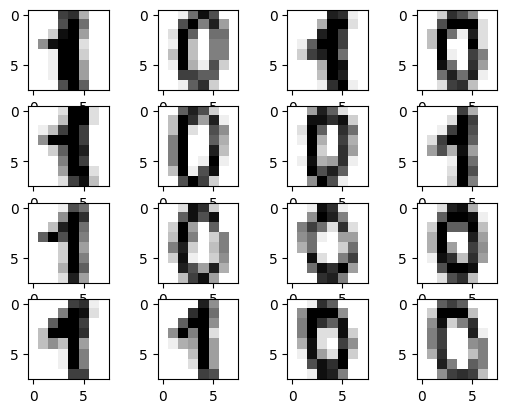

In [66]:
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X_bin[i,:,:], cmap=plt.get_cmap('gray_r'))

# Entrenando un perceptrón simple con extracción manual de características para clasificación binaria

Ahora procederemos a entrenar un perceptrón usando la biblioteca Scikit Learn. Esta biblioteca de aprendizaje automático implementa muchísimos modelos listos para usar. En este caso, usaremos el perceptrón simple `sklearn.linear_model.Perceptron`

Pero antes de definir el perceptrón, vamos a definir el método de extracción de características que transformará una imagen (`np.array`) de 8 x 8 en un vector unidimensional de 2 componentes. Para ello, podemos probar con dos estrategias diferentes (si se les ocurre alguna otra, adelante!):

* **Estrategia 1:** vamos a considerar la feature 0 como la media de intensidades de la parte superior del dígito (filas 0 a 3) y y la feature 1 como la media de la parte inferior (filas 4 a 7) tal como indica la imagen:

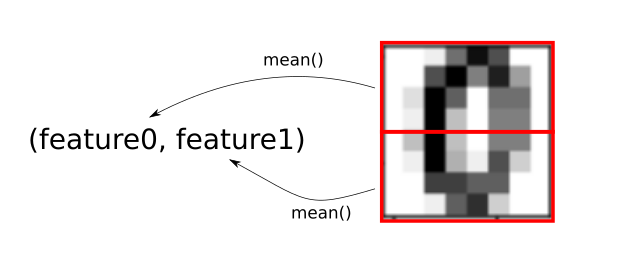

* **Estrategia 2:** Como alternativa, vamos a considerar la feature 0 como la media de toda la imagen, y la feature 1 como el desvío estandar:

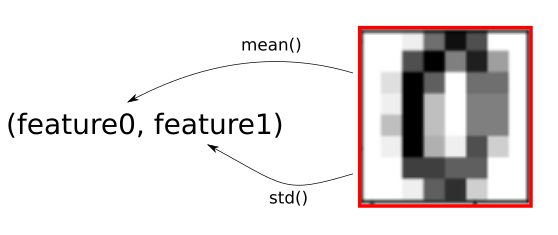


In [67]:
def extract_features_mean_std(x):
  x_out = np.zeros(shape=(1,2))
  x_out[0,0] = np.mean(x)
  x_out[0,1] = np.std(x)

  return x_out

def extract_features_mean_top_bottom(x):
  x_out = np.zeros(shape=(1,2))
  np.zeros(shape=(1,2))[0,0] = np.mean(x[0:3,:])  # promedio de la parte alta 0-3
  np.zeros(shape=(1,2))[0,1] = np.mean(x[4:7,:])  # promedio de la parte baja 4-7


  return x_out



def preprocess_features_mean_std(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_std(X[i,:,:])

  return X_pp

def preprocess_features_mean_top_bottom(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_top_bottom(X[i,:,:])

  return X_pp

Ahora implementamos el perceptrón usando la clase `sklearn.linear_model.Perceptron` y lo entrenamos usando las features elegidas (probar con ambas features y ver cuál da mejor accuracy).

In [68]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Definimos un perceptrón
clasificador = Perceptron()

# Transformamos las features de los datos para el problema binario
X_bin_train_features = preprocess_features_mean_std(X_bin_train)
X_bin_test_features = preprocess_features_mean_std(X_bin_test)

# Entrenamos el clasificador
clasificador.fit(X_bin_train_features, y_bin_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_bin_test_features, y_bin_test)))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador.predict(X_bin_test_features)))




Accuracy en test: 0.8319327731092437
Predictions: [1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 1 0 0]


# Visualizando las features

Para entender el grado de discriminabilidad que presentan nuestras features, vamos a visualizarlas. Para hacerlo, colorear los items de cada clase con un color diferente.

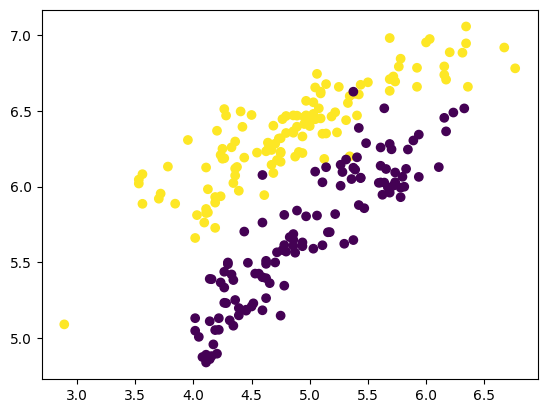

In [69]:
plt.scatter(X_bin_train_features[:, 0], X_bin_train_features[:, 1], c=y_bin_train, cmap='viridis')

# Complicando las cosas:


Ahora volvemos al caso de 10 dígitos y probamos la misma estrategia que estábamos usando anteriormente.

In [70]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Definimos un perceptrón
clasificador10 = Perceptron()

# Transformamos las features de los datos para el problema binario
X_train_features = preprocess_features_mean_std(X_train)
X_test_features = preprocess_features_mean_std(X_test)

# Entrenamos el clasificador
clasificador10.fit(X_train_features, y_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_test_features, y_test)))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador.predict(X_test_features)))



Accuracy en test: 0.15656565656565657
Predictions: [0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 

Para intentar entender por qué disminuye tan drásticamente la performance, visualicen las features de las 10 clases coloreando cada punto en un color diferente como hicimos anteriormente.

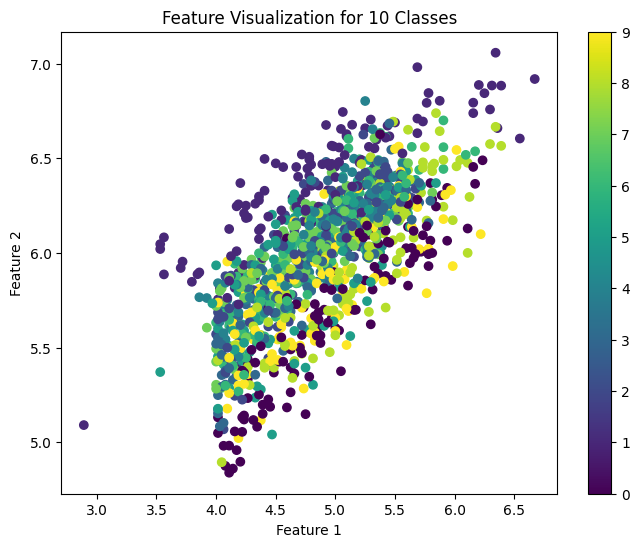

In [71]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_features[:, 0], X_train_features[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Visualization for 10 Classes')
plt.colorbar(scatter)
plt.show()

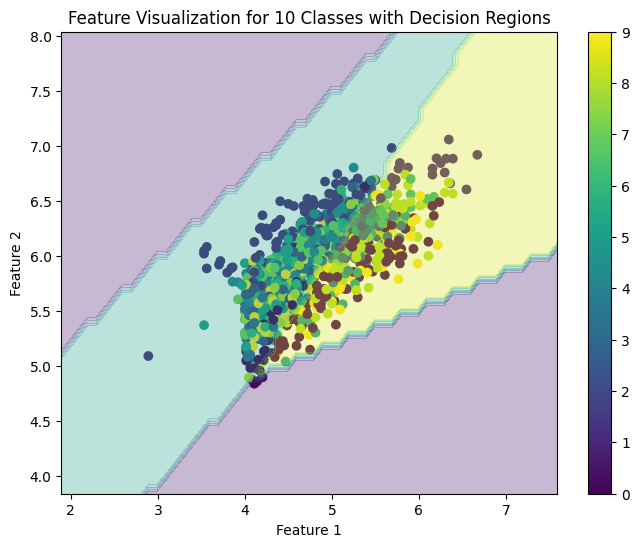

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# agrego esta vizualizacion por que me parecio interesante como se marcan las zonas

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_features[:, 0], X_train_features[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Visualization for 10 Classes with Decision Regions')
plt.colorbar(scatter)

# Create a meshgrid to cover the feature space
x_min, x_max = X_train_features[:, 0].min() - 1, X_train_features[:, 0].max() + 1
y_min, y_max = X_train_features[:, 1].min() - 1, X_train_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = clasificador10.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Filled contours for decision regions

plt.show()

# Entregable:
* Deberán entregar el Colab completo con el código funcionando. Además, deberán incluir (en el mismo Colab) un pequeño informe donde muestren las visualizaciones de las features, y responder a las siguientes preguntas:

1. ¿Cuál fue la estrategia de extracción de características que mejor funcionó? Visualizar las features generadas por los extractores implementados y utilizarlas para explicar por qué funcionó mejor esa estrategia. Propongan sus propias features para mejorar la tasa de acierto del clasfiicador.

2. ¿Cuál sería la accuracy para un algoritmo que prediga aleatoriamente las clases en el caso del problema binario si los datos de test estuvieran balanceados? ¿Y en el caso del problema multiclase de 10 dígitos?

3. El clasificador diseñado en cada caso (binario y multiclase), ¿Funcionó mejor que un clasificador aleatorio?



# Respuesta:



R1

la estrategia de extracción de características que mejor funcionó fue la primera (binario) ya que tubo un accuracy de 0.8319 comparado contra los 0.1565 de la segunda.

Para mejorar aún más la tasa de acierto del clasificador, se podrían proponer algunas features adicionales que sean específicas para el problema en cuestión. Por ejemplo, podríamos considerar características como texturas, formas o colores específicos que podrían ayudar al clasificador a distinguir mejor entre las clases.

R2

Problema binario:

Para un problema de clasificación binaria con datos balanceados (es decir, un 50% de cada clase), la accuracy esperada para un clasificador que prediga aleatoriamente sería aproximadamente del 50%.

Problema multiclase:

Para un problema multiclase con 10 dígitos balanceadas, la accuracy esperada para un clasificador que prediga aleatoriamente sería aproximadamente del 10% (1 entre 10).

R3

Clasificador binario:

El clasificador binario diseñado tiene una accuracy de 0.8319, lo cual es significativamente mejor que un clasificador aleatorio que tendría una accuracy de aproximadamente 0.50.

Clasificador multiclase:

El clasificador multiclase diseñado tiene una accuracy de 0.1565, lo cual también es mejor que un clasificador aleatorio que tendría una accuracy de aproximadamente 0.10. Aunque no es tan alto como el clasificador binario, sigue siendo mejor que una predicción aleatoria.



In [73]:
# propuesta de feature para mejorar la tasa de acierto del clasfiicador.

def extract_features_mean_left_right(x):
  x_out = np.zeros(shape=(1,2))
  x_out[0,0] = np.mean(x[:, 0:3])  # promedio de la parte izquierda
  x_out[0,1] = np.mean(x[:, 4:7])  # promedio de la parte derecha

  return x_out





def preprocess_features_mean_std(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_std(X[i,:,:])

  return X_pp

def preprocess_features_mean_top_bottom(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_top_bottom(X[i,:,:])

  return X_pp

In [74]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Definimos un perceptrón
clasificador = Perceptron(fit_intercept=True)

# Transformamos las features de los datos para el problema binario
X_bin_train_features = preprocess_features_mean_std(X_bin_train)
X_bin_test_features = preprocess_features_mean_std(X_bin_test)

# Entrenamos el clasificador
clasificador.fit(X_bin_train_features, y_bin_train)



# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_bin_test_features, y_bin_test)))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador.predict(X_bin_test_features)))




Accuracy en test: 0.8319327731092437
Predictions: [1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 1 0 0]


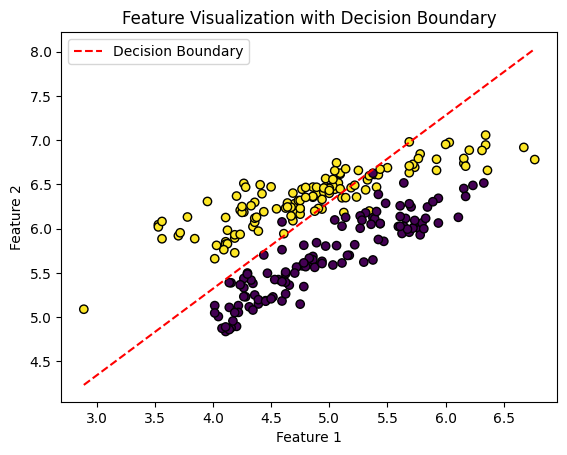

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code to create X_bin_train_features and train the classifier) ...

# Scatter plot of the features
plt.scatter(X_bin_train_features[:, 0], X_bin_train_features[:, 1], c=y_bin_train, cmap='viridis', edgecolors='k')

# Calculate the decision boundary
w = clasificador.coef_[0]  # Weights
b = clasificador.intercept_[0]  # Intercept (bias)
x_points = np.linspace(X_bin_train_features[:, 0].min(), X_bin_train_features[:, 0].max(), 100)
y_points = -(w[0] / w[1]) * x_points - (b / w[1])  # Equation of the decision boundary

# Plot the decision boundary
plt.plot(x_points, y_points, linestyle='--', color='red', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Visualization with Decision Boundary')
plt.legend()
plt.show()